In [1]:
%matplotlib inline

import numpy as np
import cvxpy as cvx
from matplotlib import pyplot as plt

# Nonnegative deconvolution

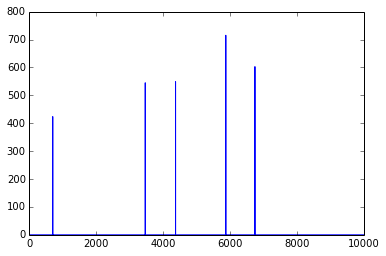

In [2]:
np.random.seed(0)
n = 10000
sigma = n/10
k = 5

x0 = np.zeros(n)
x0[np.random.choice(n,k)] = np.random.rand(k)*n/10
plt.plot(x0)

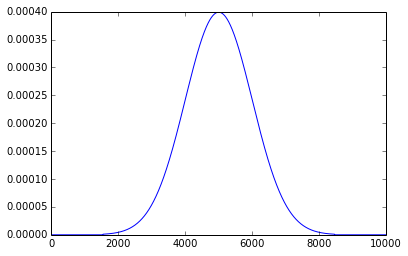

In [3]:
c = np.exp(-np.arange(-n/2., n/2.)**2./(2*sigma**2))/np.sqrt(2*sigma**2*np.pi)
c[c < 1e-6] = 0
plt.plot(c)

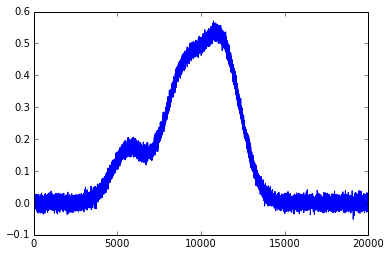

In [4]:
b = np.convolve(c, x0) 
b += np.linalg.norm(b)/20/np.sqrt(2*n-1)*np.random.randn(2*n-1)
plt.plot(b)

----------------------------------------------------------------------------
	SCS v2.0.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2017
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 69220002, CG tol ~ 1/iter^(2.00)
eps = 1.00e-05, alpha = 1.50, max_iters = 5000, normalize = 1, scale = 1.00
acceleration_lookback = 20, rho_x = 1.00e-03
Variables n = 10001, constraints m = 30001
Cones:	linear vars: 10000
	soc vars: 20001, soc blks: 1
Setup time: 4.86e+00s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 1.11e+00  1.51e+00  9.91e-01 -3.22e+01  7.73e+01  2.97e-14  3.02e+00 
   100| 1.35e-03  1.35e-03  5.05e-04  2.61e+00  2.60e+00  9.04e-15  1.44e+02 
   200| 4.85e-04  3.47e-04  1.17e-03  2.61e+00  2.60e+

RuntimeError: maximum recursion depth exceeded

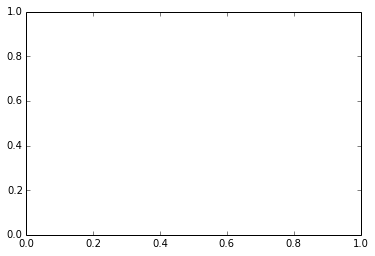

In [5]:
x = cvx.Variable(n)
f = cvx.sum_squares(cvx.conv(c, x) - b)
prob = cvx.Problem(cvx.Minimize(f), [x >= 0])
prob.solve(solver=cvx.SCS, verbose=True)
plt.plot(x.value)
plt.plot(x0)

In [ ]:
plt.plot(cvx.conv(c, x).value)
plt.plot(np.convolve(c, x0))

In [ ]:
from scipy.signal import fftconvolve
%time fftconvolve(c, x0)

In [ ]:
x = cvx.Varicable(n)
f = cvx.conv(c, x)
prob = cvx.Problem(cvx.Minimize(0), [f == 0])
A = prob.get_problem_data(cvx.SCS)["A"]

In [ ]:
%time A*x0